<a href="https://colab.research.google.com/github/VidishaPonnappa/MachineLearning/blob/main/Lesson_83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 83: Support Vector Machines - Hyperplane Visualisation I

### Teacher-Student Activities

In the previous class, you learnt to build a multiclass classification model using SVM to classify different species of Iris flower. In this class, you will learn to visualise the hyperplane generated by SVC to separate the labels.

Let's quickly go through the activities covered in the previous classes and begin this class from **Activity 1: Model Building** section.

---

### Data Description

The dataset used in the problem statement, popularly known as **Iris Dataset** or **Fisher's Dataset** is published by UCI Machine Learning Repository. It contains 3 classes of 50 instances each, where each class refers to a type of Iris flower namely:
- **Iris-setosa**
- **Iris-virginica**
- **Iris-versicolor**

<img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/Iris-update-1.png' width = 800>

***Image Credits:*** https://en.wikipedia.org/wiki/Iris_flower_data_set
```
  A. Image of Iris setosa by SteinsplitterBot, used under license Attribution-Share Alike 3.0 Unported from Wikimedia Commons.
  B. Image of Iris versicolor by Dlanglois, used under license Attribution-Share Alike 2.5 Generic from Wikimedia Commons.
  C. Image of Iris virginica by Flickr upload bot, used under license Attribution-Share Alike 2.0 Generic from Wikimedia Commons.
```

The big idea is that based on the length and width of sepals and petals of a flower, can we build a classification model that can tell us the species of a particular Iris flower? The answer is "Yes, we can". This is exactly what we will do in the next few classes.

The columns in the dataset are as follows:

|Name|Description|
|-|-|
|Id| Id of the instance or record.|
|SepalLengthCm| Length of the sepal in cm.|
|SepalWidthCm| Width of the sepal in cm.|
|PetalLengthCm| Length of the petal in cm.|
|PetalWidthCm|Width of the petal in cm.|
|Species|Name of the type of the flower|

**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/iris  

**Dataset Creator:** R.A. Fisher

**Citation:**
```
Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.
```


---

#### Recap

So let's go through the routine steps before we build a classification model and explore the dataset.

Link to the dataset: https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/iris-species.csv

In [1]:
# Load the dataset.
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset.
iris_df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/iris-species.csv")
print(iris_df.head(), "\n")

# Get information about the dataset.
print(iris_df.info(), "\n")

# Get the count of each type of flower samples in the dataset.
print(iris_df['Species'].value_counts(), "\n")

# Add a column in the Iris DataFrame to resemble the non-numeric 'Species' column as numeric using the 'map()' function.
# Create the numeric target column 'Label' to 'iris_df' using 'map()'.
iris_df['Label'] = iris_df['Species'].map({'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2})

# Verify the count of each type of flower samples in the 'Label' column.
print(iris_df['Label'].value_counts())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None 

Iris-setosa

----

#### Data Visualisation

Scatter plot between `SepalLengthCm` and `PetalLengthCm` to differentiate between the data points of different classes using the `hue` parameter.

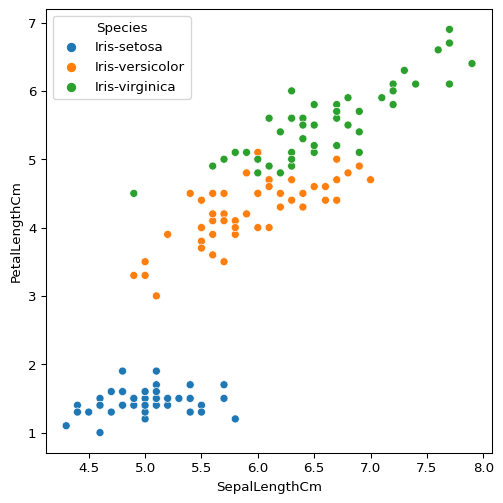

In [2]:
# Scatter plot between the 'SepalLengthCm' & 'PetalLengthCm' columns and differentiate between the data points of different classes.
plt.figure(figsize = (6, 6), dpi = 96)
sns.scatterplot(data = iris_df, x = 'SepalLengthCm', y = 'PetalLengthCm', hue = 'Species')
plt.show()

As per the properties, the output again displays two clusters where the **`Iris-setosa`** has the smallest length of the three classes, **`Iris-versicolor`** has the medium length and **`Iris-virginica`** has a high length. But due to the small margin between the medium and high length, the **`Iris-versicolor`** and **`Iris-virginica`** data points are overlapping each other.

----

#### Activity 1: Model Building^

Let's create a new SVM classification model using the independent features `SepalLengthCm` and `PetalLengthCm` only and target variable as `Label` which will classify the flowers into label `1`, `2` and `3`.

To build Support Vector Classifier model, follow the steps given below:

1. Import the `SVC` class from the `sklearn.svm` module.

2. Create `X` and `y` variables to store DataFrames containing features  (`SepalLengthCm` and `PetalLengthCm` columns) and target variable (`Label` column) respectively from the `iris_df` DataFrame.

3. Using the `train_test_split()` function, split the data into training and testing set such that the test set has 33% of one-third of the total samples.

4. Create an object of the `SVC` class, say `svc_model` and pass `kernel = "linear"` as input to its constructor.

5. Call the `fit()` function of the `SVC` class on the object created and pass `X_train` and `y_train` as inputs to the function.

In the fourth step, we have used the `kernel = "linear"` parameter to define the kind of decision boundary to be created.

**Kernel Trick:**

As we learnt above, SVM classification is done in higher dimensions which requires transforming and mapping the data points in higher dimensions. To do his transformation, we need to define a parameter so that an optimum decision surface (hyperplane/decision boundary) can be created to classify the data points. Some of the major kernels for SVC are:

- **I.**  Linear Kernel (`'linear'`)

- **II.** Gaussian Radial Basis Function Kernel (`'rbf'`)

- **III.** Polynomial Kernel (`'poly'`)

Linear kernels are used for linear hyperplanes (linear classification) and RBF and polynomial kernels are used for non-linear hyperplanes (non-linear classification) for efficient and accurate models.

You will learn to use different types of kernels in different problem statements as you move along in this course.

In [3]:
# S1.1: Create an SVM-based classification model to classify the species of the Iris flower into the labels '1', '2', and '3'.
# Import all the libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Create X and y variables
X = iris_df[['SepalLengthCm','PetalLengthCm']]
y = iris_df['Label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size = 0.33)
# Create the SVC model
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.96

The accuracy score is 96% for the Support Vector Classifier (SVC) linear model.

In [4]:
# S1.2: Make predictions on the train dataset using the 'predict()' function.
# Compute the predictions
y_train_pred_svc = pd.Series(svc.predict(X_train))
# Print the occurrence of each flower type computed in the predictions.
y_train_pred_svc.value_counts()

1    36
2    33
0    31
dtype: int64

All three labels have been identified by the SVC model.

In [5]:
# S1.3: Make predictions on the test dataset using the 'predict()' function.
# Compute the predictions
y_test_pred_svc = pd.Series(svc.predict(X_test))
# Print the occurrence of each flower type computed in the predictions.
y_test_pred_svc.value_counts()

0    19
2    16
1    15
dtype: int64

As it can be observed all three labels are identified. Let's create a confusion matrix to calculate True Positives, False Positives, True Negatives and False Negatives to evaluate the SVC linear model.

<Axes: >

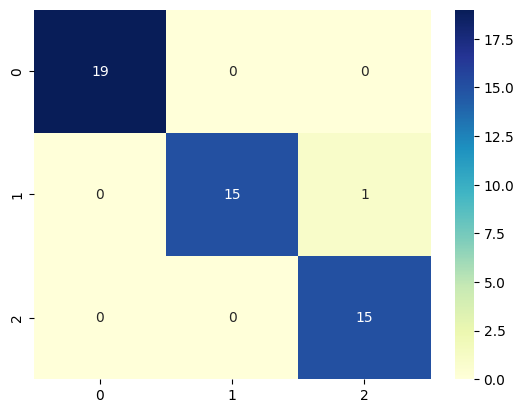

In [6]:
# S1.4: Create the confusion matrix (in the form of a heatmap) for the test set.
# Import the libraries
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Print the confusion matrix
cm_svc = confusion_matrix(y_test, y_test_pred_svc)
sns.heatmap(cm_svc, cmap = 'YlGnBu', annot = True)

The confusion matrix displays that 1 sample of class `1` is misclassified as class `2`.

Let's print the classification report to observe the recall, precision and f1-scores for linear SVC on Iris DataFrame

In [7]:
# S1.5: Display the recall, precision and f1-score values for the test set.
print(classification_report(y_test, y_test_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



The f1-scores for all the classes are satisfactory. This means we can accurately predict different species of Iris flowers on the basis of their sepal and petal lengths only.

Now, let's try to visualise the hyperplane for this SVC model.

---

#### Activity 2: The `numpy.meshgrid()` Function^^

Before we learn to visualise the hyperplane generated by an SVC model, let's refresh our knowledge of creating a mesh grid. For this, you need to use the `meshgrid()` function of the NumPy module. It creates a rectangular grid (or two-dimensional array) out of two different one-dimensional arrays, say `x` and `y`.

For example, suppose you want to create the following graph:

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/meshgrid-example-1.png' width = 700></center>

The coordinates of each of the red dots are:

\begin{equation}
(-2, -3), (-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-2, 3) \\
(-1, -3), (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (-1, 3) \\
(0, -3), (0, -2), (0, -1), (0, 0), (0, 1), (0, 2), (0, 3) \\
(1, -3), (1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3) \\
(2, -3), (2, -2), (2, -1), (2, 0), (2, 1), (2, 2), (2, 3) \\
\end{equation}

as shown in the image below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/meshgrid-example-2.png' width = 700></center>

Each of these coordinates is **ordered-pairs** of the items stored in the `x` and `y` one-dimensional arrays wherein each item of array `x` is paired with each item of array `y`.

To create such ordered-pairs, you need to use the `meshgrid()` function of the NumPy module. In the above example, `the meshgrid()` function will return two arrays of 2 dimensions.

The first array will have the following items:
```
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
```

And the second array will have the following items:
```
[[-3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]]
```

If you pair the items located at the corresponding positions in both the arrays, you will get the required ordered-pairs.

So let's create 2 one-dimensional arrays to further create the above 2 two-dimensional arrays.

In [8]:
# S2.1: Create the required 2 one-dimensional NumPy arrays.
# Create the first array containing the values -2, -1, 0, 1, 2.
a1 = np.arange(-2,3)
# Create the second array containing the values -3, -2, -1, 0, 1, 2, 3.
a2 = np.arange(-3,4)
# Print both the above arrays.
print(a1)
print(a2)

[-2 -1  0  1  2]
[-3 -2 -1  0  1  2  3]


Now, use the `meshgrid()` function of the NumPy module to generate the required two-dimensional arrays. It takes 2 one-dimensional arrays as inputs.

**Syntax:** `np.meshgrid(one_dim_array1, one_dim_array2)`

where `one_dim_array1` and `one_dim_array2` are 2 one-dimensional arrays.

**Note:** To unpack the values returned by the `meshgrid()` function, we will use two different variables in the same line separated by a comma.

In [9]:
# S2.2: Generate the required 2 two-dimensional arrays from 2 one-dimensional arrays.
ax, ay = np.meshgrid(a1,a2)
# Print the 1st two-dimensional array and its shape.
print(ax)
print(ax.shape)
# Print the 2nd two-dimensional array and its shape.
print(ay)
print(ay.shape)

[[-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]]
(7, 5)
[[-3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]
 [ 3  3  3  3  3]]
(7, 5)


Both the two-dimensional arrays have 35 items as there should be to create 35 ordered-pairs.

Now let's create the first scatter plot.

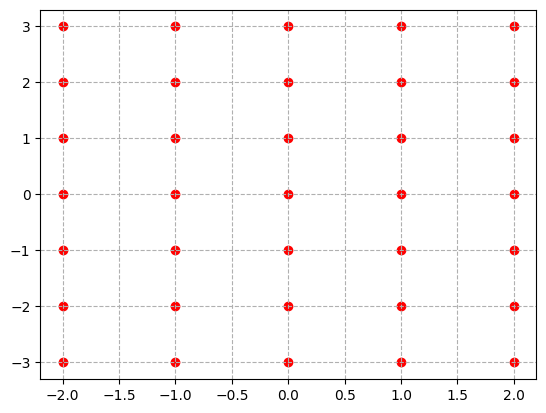

In [10]:
# S2.3: Create scatter plot having the red dots at the above mentioned coordinates.
plt.scatter(ax,ay, color = 'red')
plt.grid(which = 'major', axis = 'both', linestyle = '--')

Now let's annotate the dots in the above scatter plot with their corresponding coordinates. For this, you can use the `annotate()` function of the `matplotlib.pyplot` module. It takes two primary parameters:

1. `s` - The string value that needs to be annotated. In this case the coordinates of the red dots.

2. `xy` - The coordinates at which the desired string value needs to be placed in the plot.

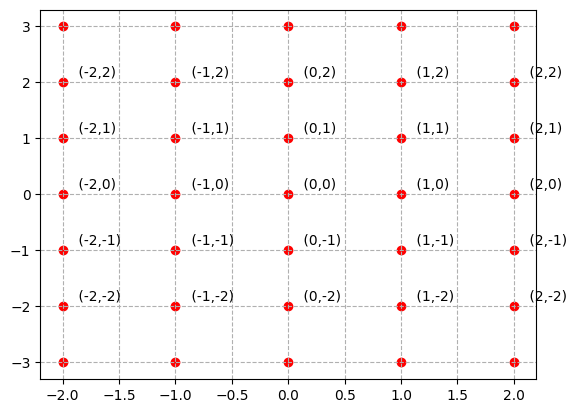

In [11]:
# S2.4: Annotate the above scatter plot such that the corresponding coordinates of the red dots are also printed along with them.
plt.scatter(ax,ay, color = 'red')
plt.grid(which = 'major', axis = 'both', linestyle = '--')
for i in range(-3,4):
  for j in range(-2,3):
    plt.annotate(text = f" ({i},{j})", xy = (i+0.1,j+ 0.1))

As you can see, we have obtained the required scatter plot.

In the above code:
```
for i in range(-2, 3):
  for j in range(-3, 4):
    plt.annotate(s = f"({i}, {j})", xy = (i + 0.1, j))
```

part of the code creates a nested `for` loop. The outer `for` loop generates values for the $x$-axis ($-2, -1, 0, 1, 2$) and the inner `for` loop generates the values for the $y$-axis ($-3, -2, -1, 0, 1, 2, 3$) for each $x$ value. The latter also annotates each red dot with its corresponding coordinates such that their horizontal positions are offset by 0.1 units.

---

#### Activity 3: The Contours^^^

To be able to visualise a hyperplane, you need to learn how to create contours. In general, a contour is a two-dimensional representation of a three-dimensional object. They are extensively used to represent the height of a mountain as shown in the image below:

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/contour-lines-elevation.png' width = 600>

</center>

As you can see in the above image, the peak of a hill is represented by the contour line having the smallest curvature. As you move outward in the contour lines figure, you are essentially walking down the hill.

**The `contour()` function:** You can create contour lines using the `contour()` function of the `matplotlib.pyplot` module. However, opposite to the real-life contour lines, the contour lines of the smallest curvature generated by this function represent the lowest value. And as you move outward, the values represented by the contour lines increase.

Let's understand this concept with the help of an example. We will create circular contour lines. For this, we need:

- Two arrays of two-dimensions generated by the `numpy.meshgrid()` as you have already seen in the previous activity of this class.

- Another two-dimensional array that represents the points in a circle. To get the points on a circle square the $x$-coordinates and $y$-coordinates and add them together i.e. $z = x^2 + y^2$

- The `contour()` function. It primarily takes 3 parameters as inputs:

  - A two-dimensional array containing $x$ values.
  - A two-dimensional array containing $y$ values.
  - A two-dimensional array containing $z$ values.

  **Syntax:** `plt.contour(x, y, z)`

  Additionally, you can provide two more parameters to the `contour()` function i.e.

  - `cmap`: It sets the colour of the contour lines.
  - `alpha`: It sets the brightness of the colours of the contour lines. Its value goes from 0 to 1 where 1 denotes the highest brightness.

  **Syntax:** `plt.contour(x, y, z, cmap, alpha)`

- The `colorbar()` function. It displays the different colours used for the contour lines wherein each colour represents whether the numerical value denoted by a contour line is high or low.

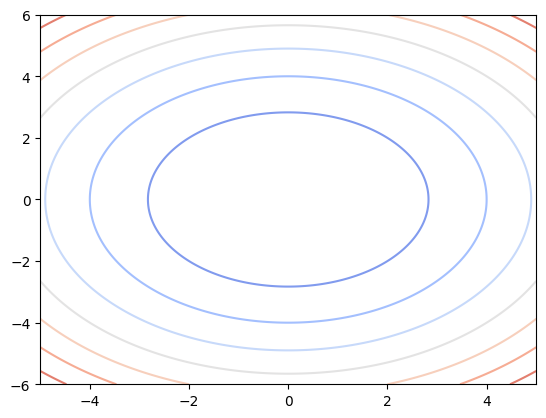

In [16]:
# T3.1: Create circular contour lines as described above.
# Create two different two-dimensional.
x_val = np.linspace(-5,5,1100)
y_val = np.linspace(-6,6,1300)
# Create two dimensional arrays from the above 2 one-dimensional arrays.
xx , yy = np.meshgrid(x_val, y_val)
# Use the equation of the circle to generate points for the circular contour lines.
zz_val = (xx)**2 + (yy)**2
# Create the circular contour lines as stated above.
# plt.figure(figsize = (6,6))
plt.contour(xx,yy,zz_val, cmap = plt.cm.coolwarm, alpha = 0.8)
# plt.colorbar()
# plt.show()

As you can see, we have created the required circular contour lines. The purple colour shows the least value as shown on the colour bar and the amber colour shows the greatest value.

**Note:** We generated thousands of `x` and `y` values so that the circular contour lines are smooth. If you plot contour lines only for a few values, the circles won't be smooth and perfect. Rather they would appear distorted having sharp edges.

Let's repeat the above activity for the arrays created in **Activity 2** to see how the contour lines appear when you have very few points to plot.

<ipython-input-22-34549bb5115c>:5: UserWarning: The following kwargs were not used by contour: 'c_map'
  plt.contour(ax,ay,zz, c_map = plt.cm.cool, alpha = 0.5)


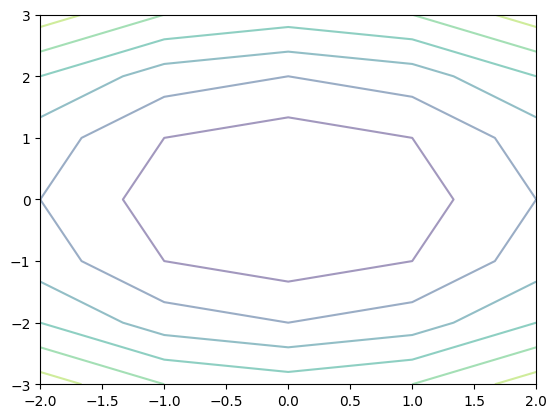

In [22]:
# S3.1: Repeat the above activity for the arrays created in Activity 2.
# Use the equation of the circle to generate points for the circular contour lines.
zz = (ax)**2 + (ay)**2
# Create the circular contour lines as stated above.
plt.contour(ax,ay,zz, c_map = plt.cm.cool, alpha = 0.5)

As you can see, the contour lines are not smooth because we have very few points (in this case 35) to plot.

**The `contourf()` function:** This function does exactly the same operation as the `contour()` function. Additionally, it fills the gaps between the contour lines.

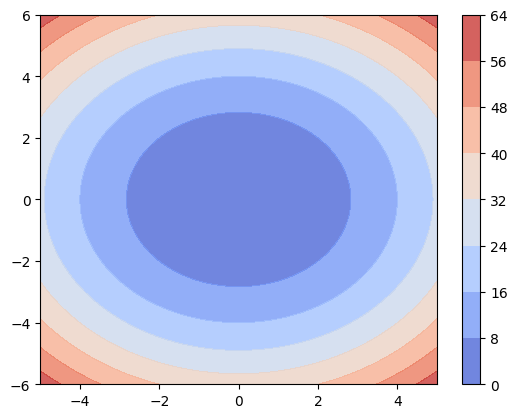

In [24]:
# S3.2: Repeat the exercise T3.1 by replacing the 'contour()' function with the 'contourf()' function.
# T3.1: Create circular contour lines as described above.
# Create two different two-dimensional.
x_val = np.linspace(-5,5,1100)
y_val = np.linspace(-6,6,1300)
# Create two dimensional arrays from the above 2 one-dimensional arrays.
xx , yy = np.meshgrid(x_val, y_val)
# Use the equation of the circle to generate points for the circular contour lines.
zz_val = (xx)**2 + (yy)**2
# Create the circular contour lines as stated above.
# plt.figure(figsize = (6,6))
plt.contourf(xx,yy,zz_val, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.colorbar()

As you can see, the gaps between the contour lines are now filled with colours and the colour bar shows the band of colours instead of a line.

Let's stop here. In the next class, we will use the knowledge of the `meshgrid()` and `contourf()` functions to visualise a hyperplane generated by an SVC model.

---

### **Project**
You can now attempt the **Applied Tech Project 83 - Support Vector Machine - Hyperplane Visualisation** on your own.
**Applied Tech Project 83 - Support Vector Machine - Hyperplane Visualisation**: https://colab.research.google.com/drive/1Jelj0ekz6esRIkUIK2BQlau2F9xBC-UA

---